In [167]:
## Import required packages
import sqlite3
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS
from linearmodels.panel import BetweenOLS
from linearmodels.panel import RandomEffects

In [50]:
cd D:\STUDY\SEM3 - summer\Programming for Data Science

C:\Users\Rohit


In [30]:
np.random.seed(10)
#os.getcwd()
#path='D:\\STUDY\\SEM3 - summer\\Programming for Data Science'
#os.chdir(path)
### Connect to Wooldridgedb
#con = sqlite3.connect("wooldridge.db")
#c = con.cursor()
#c.execute('SELECT * FROM jtrain')
#jtrain = pd.read_sql('SELECT * FROM jtrain',con)
#jtrain.head()

hprice = pd.read_csv('hprice1.csv')
type(hprice) 
hprice1 = hprice[hprice.columns[1:]]
hprice1

,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630
5,414.5,5,8566,2754,1,6.144775,6.027073,9.055556,7.920810
6,367.8,3,9000,2067,1,5.806640,5.907539,9.104980,7.633853
7,300.2,3,6210,1731,1,5.752573,5.704449,8.733916,7.456455
8,236.1,3,6000,1767,0,5.327876,5.464255,8.699514,7.477038
9,256.3,3,2892,1890,0,5.480639,5.546349,7.969704,7.544332


In [15]:
hprice.groupby(['colonial']).mean()

,price,assess,bdrms,lotsize,sqrft,lprice,lassess,llotsize,lsqrft
colonial,,,,,,,,,
0,272.370370,303.922222,3.185185,8806.703704,1957.259259,5.551281,5.674914,8.873684,7.531518
1,302.918869,320.965574,3.737705,9114.213115,2038.672131,5.669431,5.737062,8.919012,7.590798


In [ ]:
hprice.groupby(['bdrms']).mean()

In [ ]:
hprice['sqrft_cuts'] = pd.cut(hprice['sqrft'],[1000,1500,2000,2500,3000,3500,4000])
hprice.groupby(['sqrft_cuts']).mean()

In [ ]:
def sstats(data):
    df = (data.mean(),data.std(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','is null']
    return(df)
sstats(hprice)

In [ ]:
dummies = pd.get_dummies(hprice['bdrms'])
dummies

In [ ]:
plt.matshow(hprice.corr())

In [ ]:
model1 = smf.ols('price~bdrms+lotsize+sqrft+colonial',data=hprice).fit()
model1.summary()

In [ ]:
model2 = smf.ols('price~bdrms+lotsize+sqrft',data=hprice).fit()
model2.summary()

In [ ]:
model3 = smf.ols('price~ bdrms',data=hprice).fit()
model3.summary()

In [ ]:
hprice['costly'] = (hprice['price']>300).astype(int)
hprice['costly']
#model12 = smf.logit('costly~colonial+bdrms+lotsize+sqrft',data=hprice).fit()
#model12.summary()
model8 = smf.glm('costly~colonial+bdrms+llotsize+lsqrft',family=sm.families.Binomial(),data=hprice).fit()
model8.summary()


NameError: name 'model5' is not defined

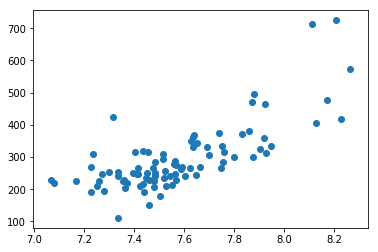

In [152]:
plt.figure()
plt.scatter(hprice['lsqrft'],hprice['price'])
x = np.linspace(7,8,1000)
y = model5.predict(pd.DataFrame({'lsqrft':x}))
print(np.hstack((x,y)))
plt.plot(x,y, c = 'red')

In [137]:
sample =  np.random.permutation(hprice1.shape[0])
#type(hprice1)

#xdata = pd.concat(hprice1[''])
train = sample[:int(hprice1.shape[0]*0.67)]
test = sample[int(hprice1.shape[0]*0.67):]
#train.shape
#hprice2 = hprice1[hprice1[hprice1.index] in train]
#train = list(train)
hprice2 = hprice1.iloc[train]
hprice2.shape
#hprice3 = hprice1.iloc[test]
#hprice3.shape

(58, 9)

In [172]:
means = KMeans(n_clusters=4).fit(hprice2)
l = means.labels_
c = means.cluster_centers_
c
#means.predict(hprice3)

array([[2.92976471e+02, 3.47058824e+00, 6.51211765e+03, 1.88323529e+03,
        6.66666667e-01, 5.55741449e+00, 5.66216098e+00, 8.72932394e+00,
        7.51552557e+00],
       [2.95200000e+02, 4.00000000e+00, 9.26810000e+04, 1.69600000e+03,
        1.00000000e+00, 5.76205200e+00, 5.68765300e+00, 1.14369200e+01,
        7.43602800e+00],
       [6.82000000e+02, 5.00000000e+00, 2.96155000e+04, 3.49650000e+03,
        5.00000000e-01, 6.57817700e+00, 6.52426850e+00, 1.02949600e+01,
        8.15839650e+00],
       [4.17900000e+02, 3.50000000e+00, 1.75692500e+04, 2.49200000e+03,
        5.00000000e-01, 5.85855675e+00, 5.99443500e+00, 9.76537650e+00,
        7.74664850e+00]])

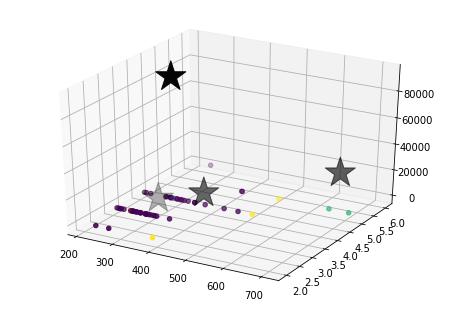

In [173]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(hprice2.iloc[:, 0],hprice2.iloc[:, 1], c=l)
ax.scatter(c[:, 0], c[:, 1], c[:, 2], marker='*', c='#050505', s=1000)

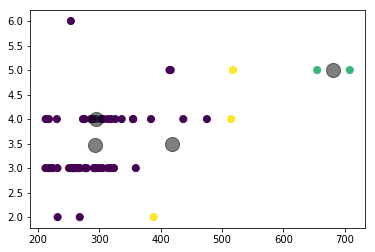

In [176]:
plt.figure()
plt.scatter(hprice2.iloc[:, 0], hprice2.iloc[:, 1], c=l, s=50, cmap='viridis')
centers = means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
    # Plot the index of the sample, so you can further investigate it in your dset
    for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
    ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
    ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
    # Plot a regular scatter plot
    #sample_colors = [ c[labels[i]] for i in range(len(hprice2)) ]
    ax.scatter(hprice2[:, 0], hprice2[:, 1], c=sample_colors, marker='o', alpha=0.2)


In [ ]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)